## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

!pip install lifetimes
import lifetimes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, median_absolute_error

## Load data

In [2]:
data_clv = pd.read_csv("MobileGame.csv", encoding="unicode_escape", parse_dates=['install_cohort'])

## Explotary Data Analysis

In [3]:
data_clv.head()

,install_cohort,days_since_install,revenue,total_installs,cum_rev,arpu
0,2015-03-01,42,14468.137796,289,14468.137796,50.062761
1,2015-03-01,60,764.962165,289,15233.099961,52.709688
2,2015-03-01,68,34405.084055,289,49638.184016,171.758422
3,2015-03-01,69,17729.292290,289,67367.476306,233.105454
4,2015-03-01,76,33442.650453,289,100810.126759,348.823968


In [4]:
# General Description
data_clv.describe()

,days_since_install,revenue,total_installs,cum_rev,arpu
count,67560.000000,6.756000e+04,6.756000e+04,6.756000e+04,67560.000000
mean,283.552043,1.528436e+05,1.053914e+06,6.821477e+07,67.556784
std,237.915083,2.045282e+05,6.084626e+05,4.342732e+07,37.354955
min,-792.000000,9.490132e+01,1.490000e+02,9.490132e+01,0.000035
25%,96.000000,3.543917e+04,7.918640e+05,4.037755e+07,44.370281
50%,250.000000,8.122211e+04,9.600220e+05,6.757673e+07,69.593133
75%,450.000000,1.815443e+05,1.094166e+06,9.227602e+07,89.670680
max,926.000000,4.261046e+06,5.439207e+06,2.790897e+08,596.550548


In [5]:
print("There are only numeric and date variables in the dataset w/o categorical variables.")
print("It presents negative values in days_since_install columns, which doesn't make logical sense.")

There are only numeric and date variables in the dataset w/o categorical variables.
It presents negative values in days_since_install columns, which doesn't make logical sense.


In [6]:
# Remove fallacious rows with negative values on days since install
data_clv = data_clv[data_clv['days_since_install'] > 0]

In [7]:
data_clv.describe()

,days_since_install,revenue,total_installs,cum_rev,arpu
count,62911.000000,6.291100e+04,6.291100e+04,6.291100e+04,62911.000000
mean,311.500135,1.604166e+05,1.058900e+06,7.324072e+07,72.533024
std,219.907904,1.970891e+05,6.236243e+05,4.072094e+07,33.743548
min,1.000000,9.490132e+01,1.490000e+02,2.866212e+02,0.048981
25%,126.000000,4.321557e+04,7.968120e+05,4.790186e+07,50.573839
50%,274.000000,8.842503e+04,9.600220e+05,7.018618e+07,72.364605
75%,467.000000,1.928587e+05,1.127966e+06,9.415616e+07,91.363196
max,926.000000,3.475016e+06,5.439207e+06,2.790897e+08,596.550548


In [8]:
# Check on Missing Values
pd.DataFrame(zip(data_clv.isnull().sum(), data_clv.isnull().sum()/len(data_clv)), columns=['Count', 'Percentage'], index=data_clv.columns)

,Count,Percentage
install_cohort,0,0.0
days_since_install,0,0.0
revenue,0,0.0
total_installs,0,0.0
cum_rev,0,0.0
arpu,0,0.0


In [9]:
print("Good news: There are no missing values in the data set!")

Good news: There are no missing values in the data set!


In [10]:
# Check on time range of install cohort date
maxdate = data_clv['install_cohort'].dt.date.max()
mindate = data_clv['install_cohort'].dt.date.min()
print(f"The Time range of Install Cohort are: {mindate} to {maxdate}")

The Time range of Install Cohort are: 2015-03-01 to 2017-10-15


In [11]:
# Check on the the largest 'days since install' by install cohort
customer = data_clv.groupby('install_cohort').agg({'days_since_install': lambda x: max(x)})
customer

,days_since_install
install_cohort,
2015-03-01,910
2015-03-08,678
2015-03-15,505
2015-03-22,445
2015-03-29,921
...,...
2017-09-17,35
2017-09-24,28
2017-10-01,21


### Business Question One: Which cohort has the highest total_installs, arpu and cumulative revenue? 

In [12]:
# Merge data to only keep rows with the cumulative information of each cohort
data_update = pd.merge(data_clv, customer, on=['install_cohort', 'days_since_install'])
data_update

,install_cohort,days_since_install,revenue,total_installs,cum_rev,arpu
0,2015-03-01,910,18589.155777,289,1.724031e+05,596.550548
1,2015-03-08,678,9679.934769,149,4.810730e+04,322.867793
2,2015-03-15,505,4792.037424,635,3.419448e+05,538.495745
3,2015-03-22,445,478.341003,5989,3.256745e+04,5.437878
4,2015-03-29,921,1916.239810,19512,2.953151e+06,151.350493
...,...,...,...,...,...,...
133,2017-09-17,35,48560.718510,736576,1.755889e+07,23.838537
134,2017-09-24,28,46340.602752,653379,1.221610e+07,18.696811
135,2017-10-01,21,58807.185408,576633,9.558089e+06,16.575689
136,2017-10-08,14,75283.588538,541017,7.840038e+06,14.491297


In [13]:
top_installs = data_update.sort_values(by=['total_installs'], ascending=False).head(10)
top_cumrev = data_update.sort_values(by=['cum_rev'], ascending=False).head(10)
top_arpu = data_update.sort_values(by=['arpu'], ascending=False).head(10)

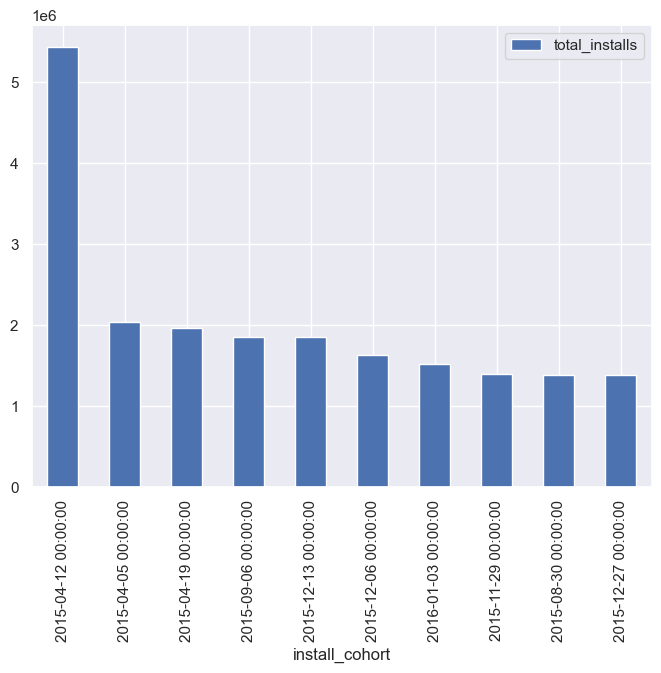

In [14]:
top_installs.plot(x="install_cohort", y="total_installs", kind="bar",figsize=(8,6))
plt.show()

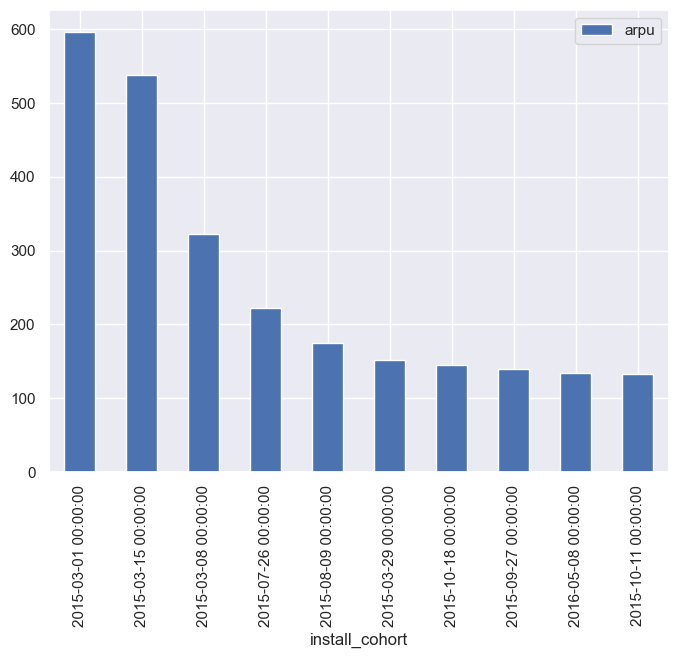

In [15]:
top_arpu.plot(x="install_cohort", y="arpu", kind="bar",figsize=(8,6))
plt.show()

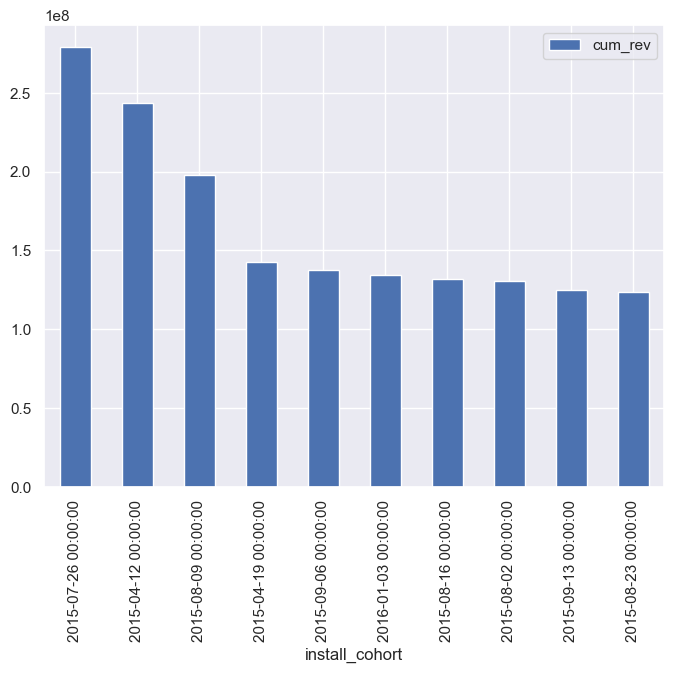

In [16]:
top_cumrev.plot(x="install_cohort", y="cum_rev", kind="bar",figsize=(8,6))
plt.show()

### Install Cohort 2015-04-12 has the most total installs; Install Cohort 2015-03-01 has the highest ARPU; Install Cohort 2015-07-26 has the highest cumulative revenue."

## CLV Analysis

### Business Question Two: What's the average CLV of all the install cohorts? 

In [17]:
# Aggregate Model
# calculating the CLV by using the average revenue per cohort.
# This method gives us a single value for the CLV of all cohorts
# This assumes a constant average spend and churn rate for all cohorts.

In [18]:
# Transforming the data to cohort level for the analysis
cohort = data_clv.groupby('install_cohort').agg({ 'install_cohort': lambda x: len(x),
                                                  'revenue': lambda x: sum(x)/len(x)})

cohort.columns = ['Frequency', 'AverageRevenue']
cohort

,Frequency,AverageRevenue
install_cohort,,
2015-03-01,10,17240.310836
2015-03-08,4,12026.825272
2015-03-15,33,10361.963579
2015-03-22,24,1356.977057
2015-03-29,508,5813.289012
...,...,...
2017-09-17,35,451185.667914
2017-09-24,28,381462.091706
2017-10-01,21,391853.900503


In [19]:
# Calculating the necessary variables for CLV calculation
Average_revenue = round(np.mean(cohort['AverageRevenue']),2)
print(f"Average revenue: ${Average_revenue}")

Revenue_freq = round(np.mean(cohort['Frequency']), 2)
print(f"Revenue Frequency: {Revenue_freq}")

retention_rate = data_update[data_update['arpu']>100].shape[0]/data_clv.shape[0]
churn = round(1 - retention_rate, 2)
print(f"Churn: {churn}%")

Average revenue: $187740.91
Revenue Frequency: 455.88
Churn: 1.0%


In [20]:
# Assume 5% of the total revenue 
Profit_margin = 0.05 

CLV = round(((Average_revenue * Revenue_freq/churn)) * Profit_margin, 2)
CLV

4279366.3

### The average CLV for each cohort is: $4.28MM 

### Business Question Three: Install cohorts of which month has the highest average CLV?

In [21]:
# Cohort Model
# The main assumption of this model is that, install cohorts in the same months have similar churn rates

In [22]:
# Transforming the data to customer level for the analysis
cohort = data_clv.groupby('install_cohort').agg({'install_cohort':lambda x: x.min().month, 
                                                 'days_since_install': lambda x: len(x),
                                                 'revenue': lambda x: sum(x)/len(x),
                                                 'arpu': lambda x: max(x)})

cohort.columns = ['Install_Month', 'Frequency', 'AverageRevenue','ARPU']
cohort.head()

,Install_Month,Frequency,AverageRevenue,ARPU
install_cohort,,,,
2015-03-01,3,10,17240.310836,596.550548
2015-03-08,3,4,12026.825272,322.867793
2015-03-15,3,33,10361.963579,538.495745
2015-03-22,3,24,1356.977057,5.437878
2015-03-29,3,508,5813.289012,151.350493


In [23]:
# Calculating CLV for each month
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []

for i in range(1, 13):
    cohort_m = cohort[cohort['Install_Month']==i]
    
    Average_revenue = round(np.mean(cohort_m['AverageRevenue']),2)
    
    Frequency = round(np.mean(cohort_m['Frequency']), 2)
    
    Retention_rate = cohort_m[cohort_m['ARPU']>100].shape[0]/cohort_m.shape[0]
    
    churn = round(1 - Retention_rate, 2)
        
    CLV = round(((Average_revenue * Frequency/churn)) * Profit_margin, 2)
    Monthly_CLV.append(CLV)
Monthly_CLV

[6584838.81,
 6063912.27,
 2192341.23,
 4904186.82,
 4440114.21,
 5200707.51,
 4733173.92,
 9536450.8,
 10593941.6,
 14792769.73,
 7317636.15,
 4674378.46]

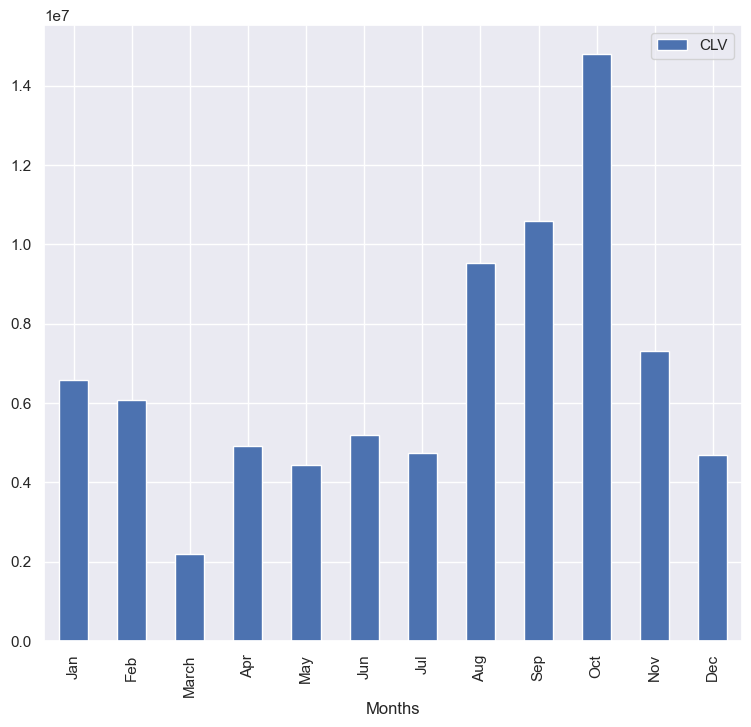

In [24]:
# Plot the average CLV for each month
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
monthly_clv.plot(x="Months", y="CLV", kind="bar",figsize=(9,8))
plt.show()

### October install cohort demonstrates the highest CLV followed by Sep and August cohorts.

### Business Question Four: What is the total estmiated CLV for the next one year of all install cohorts? 

In [25]:
# Probability Model 
# BG/NBD stands for Beta Geometric/Negative Binomial Distribution.
# This is one of the most commonly used probabilistic model for predicting the CLV.
# To be precise, BG/NBD model actually tries to predict the future transactions  of each customer (install cohort). 
# It is then combined with Gamma-Gamma model, which then adds the monetary aspect of the customer transaction (revenue) 
# and we finally get the total revenue / customer lifetime value (CLV).


In [26]:
# create a new column 'install_month'
data_clv['install_month'] = data_clv['install_cohort'].dt.month

In [27]:
# create a new column 'billing_date' = install_cohort + days_since_install
data_clv['billing_date'] = pd.to_datetime(data_clv['install_cohort'])+pd.to_timedelta(data_clv['days_since_install'],unit = 'd')

In [28]:
data_clv.head(20)

,install_cohort,days_since_install,revenue,total_installs,cum_rev,arpu,install_month,billing_date
0,2015-03-01,42,14468.137796,289,14468.137796,50.062761,3,2015-04-12
1,2015-03-01,60,764.962165,289,15233.099961,52.709688,3,2015-04-30
2,2015-03-01,68,34405.084055,289,49638.184016,171.758422,3,2015-05-08
3,2015-03-01,69,17729.292290,289,67367.476306,233.105454,3,2015-05-09
4,2015-03-01,76,33442.650453,289,100810.126759,348.823968,3,2015-05-16
5,2015-03-01,77,9585.033447,289,110395.160207,381.990174,3,2015-05-17
6,2015-03-01,108,9585.033447,289,119980.193654,415.156379,3,2015-06-17
7,2015-03-01,132,9585.033447,289,129565.227101,448.322585,3,2015-07-11
8,2015-03-01,613,24248.725481,289,153813.952583,532.228210,3,2016-11-03
9,2015-03-01,910,18589.155777,289,172403.108359,596.550548,3,2017-08-27


In [29]:
# Get install_cohort, billing_date, revenue columns
features = ['install_cohort', 'billing_date', 'revenue']
data_clv_prob = data_clv[features]
data_clv_prob.head(20)

,install_cohort,billing_date,revenue
0,2015-03-01,2015-04-12,14468.137796
1,2015-03-01,2015-04-30,764.962165
2,2015-03-01,2015-05-08,34405.084055
3,2015-03-01,2015-05-09,17729.292290
4,2015-03-01,2015-05-16,33442.650453
5,2015-03-01,2015-05-17,9585.033447
6,2015-03-01,2015-06-17,9585.033447
7,2015-03-01,2015-07-11,9585.033447
8,2015-03-01,2016-11-03,24248.725481
9,2015-03-01,2017-08-27,18589.155777


In [30]:
# Recency, Frequency, Time and monetary_value
"""
frequency - the number of repeat purchases (more than 1 purchases)
recency - the time between the first and the last transaction
T - the time between the first purchase and the end of the transaction period
monetary_value - it is the mean of a given customers' revenue
"""

summary = lifetimes.utils.summary_data_from_transaction_data(data_clv_prob, 'install_cohort', 'billing_date', 'revenue',\
                                                            include_first_transaction=False)
summary = summary.reset_index()
summary

,install_cohort,frequency,recency,T,monetary_value
0,2015-03-01,9.0,868.0,924.0,17548.330063
1,2015-03-08,3.0,649.0,930.0,12649.994638
2,2015-03-15,32.0,481.0,928.0,10676.818029
3,2015-03-22,23.0,430.0,930.0,1332.661286
4,2015-03-29,507.0,918.0,935.0,5822.870009
...,...,...,...,...,...
133,2017-09-17,34.0,34.0,34.0,425880.590276
134,2017-09-24,27.0,27.0,27.0,358570.529677
135,2017-10-01,20.0,20.0,20.0,363285.229447
136,2017-10-08,13.0,13.0,13.0,417489.641784


count    138.000000
mean     454.876812
std      275.155734
min        3.000000
25%      217.750000
50%      457.500000
75%      690.250000
max      925.000000
Name: frequency, dtype: float64


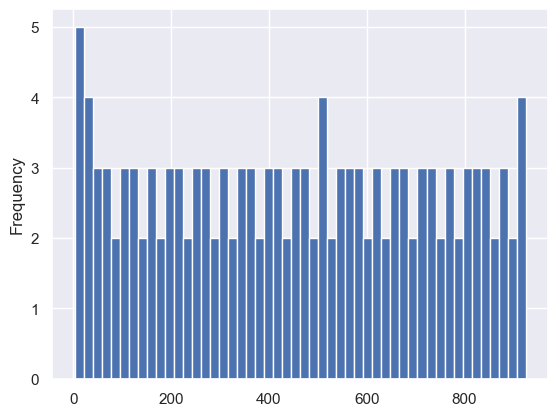

In [31]:
# Create a distribution of frequency
summary['frequency'].plot(kind='hist', bins=50)
print(summary['frequency'].describe())

In [32]:
#### Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.6)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 138 subjects, a: 0.00, alpha: 0.70, b: 0.09, r: 0.67>

In [33]:
# Model summary
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.674656,0.051615,0.573490,0.775821
alpha,0.696875,0.089893,0.520685,0.873066
a,0.000844,0.000677,-0.000484,0.002172
b,0.088832,0.050935,-0.011000,0.188665


In [34]:
# Compute the cohort retention (1-churn%) probability
summary['retention_rate'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head()

,install_cohort,frequency,recency,T,monetary_value,retention_rate
0,2015-03-01,9.0,868.0,924.0,17548.330063,0.999809
1,2015-03-08,3.0,649.0,930.0,12649.994638,0.998489
2,2015-03-15,32.0,481.0,928.0,10676.818029,0.000018
3,2015-03-22,23.0,430.0,930.0,1332.661286,0.000313
4,2015-03-29,507.0,918.0,935.0,5822.870009,0.981937


In [35]:
#Predict future transaction for the next one year based on historical data
t = 365
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.head(10)

,install_cohort,frequency,recency,T,monetary_value,retention_rate,pred_num_txn
0,2015-03-01,9.0,868.0,924.0,17548.330063,0.999809,3.82
1,2015-03-08,3.0,649.0,930.0,12649.994638,0.998489,1.44
2,2015-03-15,32.0,481.0,928.0,10676.818029,0.000018,0.00
3,2015-03-22,23.0,430.0,930.0,1332.661286,0.000313,0.00
4,2015-03-29,507.0,918.0,935.0,5822.870009,0.981937,194.43
5,2015-04-05,925.0,925.0,930.0,118772.680953,0.999866,362.93
6,2015-04-12,923.0,923.0,923.0,255233.669505,0.999999,364.94
7,2015-04-19,916.0,916.0,916.0,151389.864495,0.999999,364.94
8,2015-04-26,909.0,909.0,909.0,118573.271627,0.999999,364.94
9,2015-05-03,900.0,901.0,902.0,114181.942338,0.999997,364.13


In [36]:
# Checking the relationship between frequency and monetary_value
summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,-0.526408
monetary_value,-0.526408,1.000000


In [37]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(summary['frequency'],
       summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 138 subjects, p: 8.20, q: 0.14, v: 8.20>

In [38]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,8.199489,1.393404,5.468417,10.930560
q,0.135342,0.012214,0.111403,0.159282
v,8.197351,1.393577,5.465941,10.928762


In [39]:
# Calculating the conditional expected average profit for each install cohort
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_revenue'] = ggf.conditional_expected_average_profit(summary['frequency'], summary['monetary_value'])
summary.head()

,install_cohort,frequency,recency,T,monetary_value,retention_rate,pred_num_txn,exp_avg_revenue
0,2015-03-01,9.0,868.0,924.0,17548.330063,0.999809,3.82,17757.302453
1,2015-03-08,3.0,649.0,930.0,12649.994638,0.998489,1.44,13113.684577
2,2015-03-15,32.0,481.0,928.0,10676.818029,0.000018,0.00,10712.375701
3,2015-03-22,23.0,430.0,930.0,1332.661286,0.000313,0.00,1339.157591
4,2015-03-29,507.0,918.0,935.0,5822.870009,0.981937,194.43,5824.097551


In [40]:
summary['CLV_365'] = summary['pred_num_txn'] * summary['exp_avg_revenue'] * Profit_margin
summary.head()

,install_cohort,frequency,recency,T,monetary_value,retention_rate,pred_num_txn,exp_avg_revenue,CLV_365
0,2015-03-01,9.0,868.0,924.0,17548.330063,0.999809,3.82,17757.302453,3391.644769
1,2015-03-08,3.0,649.0,930.0,12649.994638,0.998489,1.44,13113.684577,944.185290
2,2015-03-15,32.0,481.0,928.0,10676.818029,0.000018,0.00,10712.375701,0.000000
3,2015-03-22,23.0,430.0,930.0,1332.661286,0.000313,0.00,1339.157591,0.000000
4,2015-03-29,507.0,918.0,935.0,5822.870009,0.981937,194.43,5824.097551,56618.964345


In [41]:
# Distribution of CLV for the business in the next 365 days
summary['CLV_365'].describe()

count    1.380000e+02
mean     3.327319e+06
std      1.433605e+06
min      0.000000e+00
25%      2.493487e+06
50%      3.080559e+06
75%      4.108108e+06
max      7.815305e+06
Name: CLV_365, dtype: float64

In [42]:
# Total CLV for the business in the next 365 days
summary['CLV_365'].sum()

459170039.9627521

### According to Probability Model, the total CLV in next year of all the exisiting install cohorts are 459MM approximately. 

### Business Question Five: Which behavior has influence on CLV of each install cohort? What are the relationship? 

In [43]:
# Machine Learning Model

In [44]:
# Read data
# data_clv = pd.read_csv('MobileGame.csv')
data_clv = pd.read_csv("MobileGame.csv", encoding="unicode_escape", parse_dates=['install_cohort'])
data_clv.head()

,install_cohort,days_since_install,revenue,total_installs,cum_rev,arpu
0,2015-03-01,42,14468.137796,289,14468.137796,50.062761
1,2015-03-01,60,764.962165,289,15233.099961,52.709688
2,2015-03-01,68,34405.084055,289,49638.184016,171.758422
3,2015-03-01,69,17729.292290,289,67367.476306,233.105454
4,2015-03-01,76,33442.650453,289,100810.126759,348.823968


In [45]:
## We are going to determine basic information about each cohort's average 
## lifetime revenue amount, as well as each cohort’s duration and frequency of spending.

# Create functions
def groupby_sum(x):
    return x.sum()

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def total_duration(x):
    return (x.max() - x.min())

def avg_duration(x):
    return (x.max() - x.min()) / x.count()

groupby_sum.__name__ = 'sum'
groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
total_duration.__name__ = 'total_duration'
avg_duration.__name__ = 'avg_duration'

In [46]:
# Create a summary using df to calculate the followings of install cohort
## Revenue (min, max)
## Days since install (min, max)

data_clv_summary = data_clv.reset_index().groupby('install_cohort').agg({
            'revenue': [groupby_sum, groupby_count],
            'days_since_install': [min, max, total_duration, avg_duration],
            'total_installs': [groupby_mean]
             })

data_clv_summary.head()

revenue       days_since_install                      \
                         sum count                min  max total_duration   
install_cohort                                                              
2015-03-01      1.724031e+05    10                 42  910            868   
2015-03-08      4.810730e+04     4                 29  678            649   
2015-03-15      3.419448e+05    33                 24  505            481   
2015-03-22      3.256745e+04    24                 15  445            430   
2015-03-29      2.953151e+06   508                  3  921            918   

                            total_installs  
               avg_duration            avg  
install_cohort                              
2015-03-01        86.800000          289.0  
2015-03-08       162.250000          149.0  
2015-03-15        14.575758          635.0  
2015-03-22        17.916667         5989.0  
2015-03-29         1.807087        19512.0

In [47]:
data_clv_summary.columns=data_clv_summary.columns.droplevel(0)
data_clv_summary.columns

Index(['sum', 'count', 'min', 'max', 'total_duration', 'avg_duration', 'avg'], dtype='object')

In [48]:
data_clv_summary.rename(columns={'sum': 'revenue_sum',
         'count': 'frequency', 'min': 'recency', 'max': 'days_since_install_max', 
         'total_duration': 'total_duration', 'avg_duration': 'avg_duration', 'avg': 'total_installs'}, inplace = True)

data_clv_summary.head(10)

,revenue_sum,frequency,recency,days_since_install_max,total_duration,avg_duration,total_installs
install_cohort,,,,,,,
2015-03-01,1.724031e+05,10,42,910,868,86.800000,289.0
2015-03-08,4.810730e+04,4,29,678,649,162.250000,149.0
2015-03-15,3.419448e+05,33,24,505,481,14.575758,635.0
2015-03-22,3.256745e+04,24,15,445,430,17.916667,5989.0
2015-03-29,2.953151e+06,508,3,921,918,1.807087,19512.0
2015-04-05,1.127850e+08,928,-1,926,927,0.998922,2036814.0
2015-04-12,2.433289e+08,931,-7,924,931,1.000000,5439207.0
2015-04-19,1.427212e+08,927,-10,917,927,1.000000,1971266.0
2015-04-26,1.107665e+08,927,-18,910,928,1.001079,1298263.0


In [49]:
# Correlation analysis 
corr = data_clv_summary.corr()
corr

,revenue_sum,frequency,recency,days_since_install_max,total_duration,avg_duration,total_installs
revenue_sum,1.000000,0.792928,0.117673,0.680504,0.582418,-0.263941,0.699895
frequency,0.792928,1.000000,0.233713,0.907959,0.719755,-0.257577,0.521276
recency,0.117673,0.233713,1.000000,0.359278,-0.393487,0.117771,0.068453
days_since_install_max,0.680504,0.907959,0.359278,1.000000,0.716576,0.068521,0.407750
total_duration,0.582418,0.719755,-0.393487,0.716576,1.000000,-0.020523,0.350514
avg_duration,-0.263941,-0.257577,0.117771,0.068521,-0.020523,1.000000,-0.243450
total_installs,0.699895,0.521276,0.068453,0.407750,0.350514,-0.243450,1.000000


<AxesSubplot:>

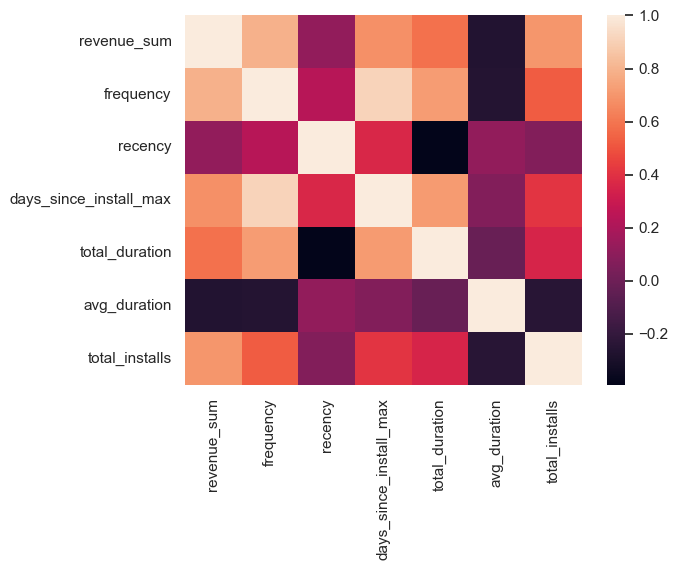

In [50]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [51]:
# Define target variable and features 
target_var = 'revenue_sum'
all_features = [x for x in data_clv_summary.columns if x not in ['install_cohort', 'revenue_sum']]
all_features

['frequency',
 'recency',
 'days_since_install_max',
 'total_duration',
 'avg_duration',
 'total_installs']

In [52]:
# Split into train and test sets (25%)
X_train, X_test, y_train, y_test = train_test_split(data_clv_summary[all_features], data_clv_summary[target_var], random_state=2,test_size=0.25)


In [53]:
# Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
# Get coefficients for features
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [55]:
# Get predictions
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

In [56]:
# R-sqaure
r2_score(y_true = y_train, y_pred = train_preds)

0.7277466294353905

In [57]:
r2_score(y_true = y_test, y_pred = test_preds)

0.7865700437873212

In [58]:
# MedAE
median_absolute_error(y_true = y_train, y_pred=train_preds)

9978091.7925977

In [59]:
median_absolute_error(y_true = y_test, y_pred=test_preds)

11963513.440197267

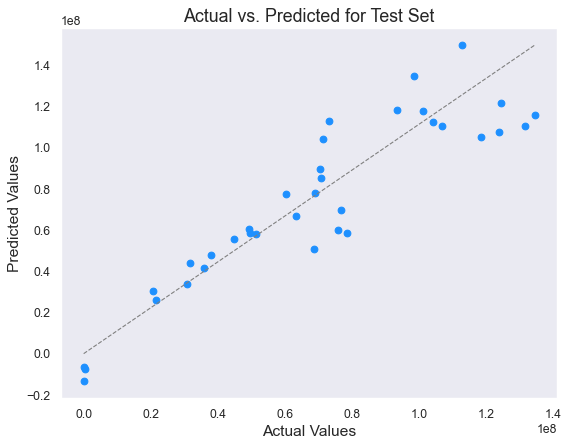

In [60]:
# Scatter plot
# Build a scatter plot to compare actual and predicted values for a test set
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

###  Transaction frequency, number of days since install & total duration, total installs have strong positive relationship with CLV (revenue) of install cohort. Shorter duration between transaction of installs cohort correlates with higher CLV (revenue). Counter intuitively, an install cohort with more recent transaction is associated with smaller CLV (revenue), which might be due to the multicollinearity between recency and days since install. 
